### Mustafa Kutay Yabas - EC581 - 08.10.2016
# Assignment #2.1

## Hypothesis
EUR/USD is likely to follow a pattern similar to DAX/SPX

## Indicators
- SPX Index
- DAX Index
- EURUSD Currency Rate

In [4]:
library(zoo)
library(xts)
library(Quandl)


In [2]:
# Get data from Quandl
spx = Quandl("YAHOO/INDEX_GSPC", start_date="2014-01-01")
dax = Quandl("YAHOO/INDEX_GDAXI", start_date="2014-01-01")
exc = Quandl("ECB/EURUSD", start_date="2014-01-01") #exchange rate eurusd


# Observe the data
print("SPX Index")
head(spx)
print("DAX Index")
head(dax)
print("EUR/USD")
head(exc)

[1] "SPX Index"


Date,Open,High,Low,Close,Volume,Adjusted Close
2016-10-07,2164.19,2165.86,2144.85,2153.74,3619890000,2153.74
2016-10-06,2158.22,2162.93,2150.28,2160.77,3461550000,2160.77
2016-10-05,2155.15,2163.95,2155.15,2159.73,3906550000,2159.73
2016-10-04,2163.37,2165.46,2144.01,2150.49,3750890000,2150.49
2016-10-03,2164.33,2164.41,2154.77,2161.20,3137550000,2161.20
2016-09-30,2156.51,2175.30,2156.51,2168.27,4173340000,2168.27


[1] "DAX Index"


Date,Open,High,Low,Close,Volume,Adjusted Close
2016-10-07,10549.69,10579.09,10465.35,10490.86,121513900,10490.86
2016-10-06,10641.13,10641.13,10537.68,10568.80,105395600,10568.80
2016-10-05,10535.62,10622.44,10486.63,10585.78,93834300,10585.78
2016-10-04,10492.97,10646.72,10492.25,10619.61,127581300,10619.61
2016-09-30,10240.69,10531.26,10189.94,10511.02,182523300,10511.02
2016-09-29,10545.60,10575.34,10370.23,10405.54,100763500,10405.54


[1] "EUR/USD"


Date,Value
2016-10-07,1.1140
2016-10-06,1.1185
2016-10-05,1.1211
2016-10-04,1.1161
2016-10-03,1.1236
2016-09-30,1.1161


In [17]:
zspx = zoo(spx$Close, order.by=spx$Date)
zdax = zoo(dax$Close, order.by=dax$Date)
#zexc = zoo(exc$Value, order.by=exc$Date)

#zspx.rets = log(lag(zspx)) - log(zspx)
#zdax.rets = log(lag(zdax)) - log(zdax)
#zexc.rets = log(lag(zexc)) - log(zexc)

eurusd = zoo(exc$Value, order.by=exc$Date)
daxspx = zdax/zspx
spxdax = zspx/zdax

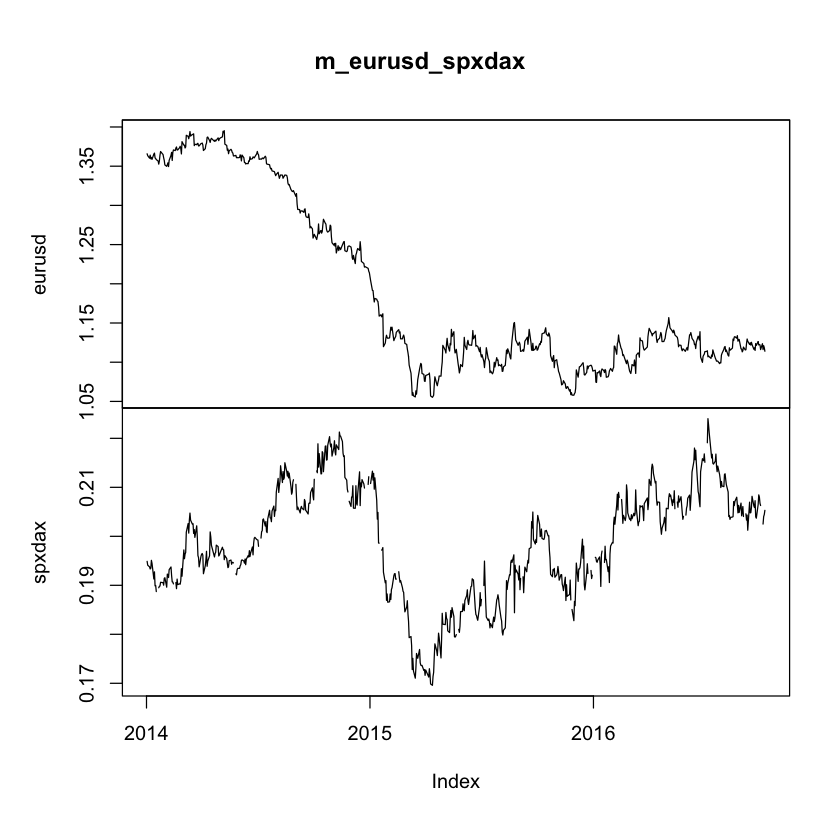

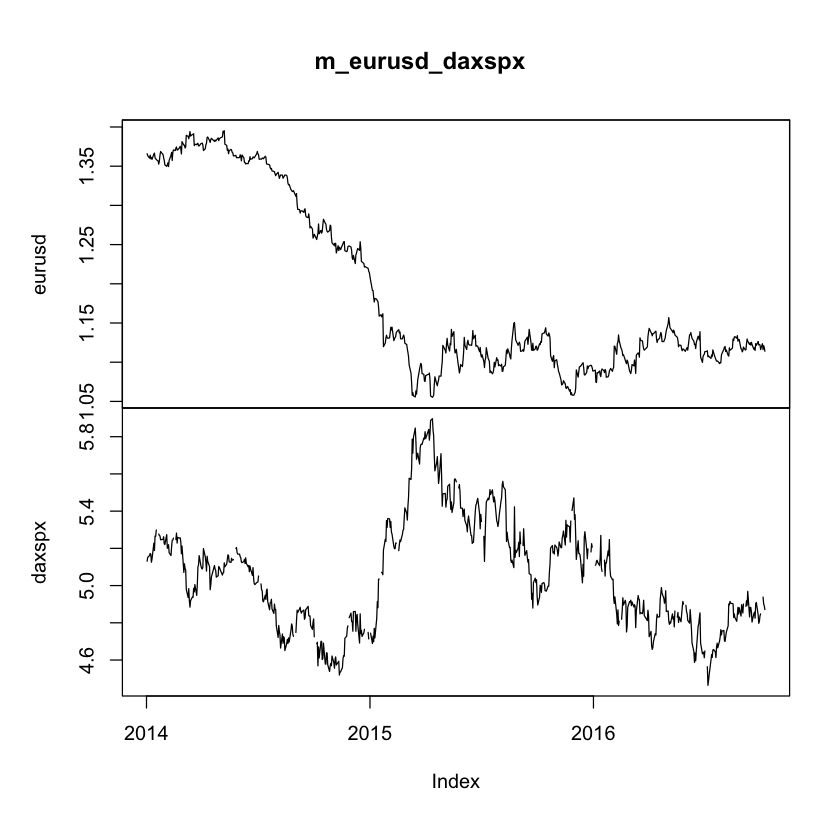

In [27]:
m_eurusd_spxdax = merge(eurusd,spxdax)
m_eurusd_daxspx = merge(eurusd,daxspx)
plot(m_eurusd_spxdax)
plot(m_eurusd_daxspx)

### It seems like there is no correlation

In [29]:
print(cor(na.locf(m_eurusd_spxdax$eurusd),na.locf(m_eurusd_spxdax$spxdax)))
print(cor(na.locf(m_eurusd_daxspx$eurusd),na.locf(m_eurusd_daxspx$daxspx)))

[1] 0.219871
[1] -0.2368173


It can be seen that there is no significant correlation between spx/dax and eur/usd
The fundamental foundation of the strategy is not promising.